### Predicting The Stock Market

**Note**: You shouldn't make trades with any model developed in this project.

In this project, we'll be working with data from the [S&P500 Index](https://en.wikipedia.org/wiki/S%26P_500_Index). The S&P500 is a stock market index.

The data is in [Kaggle](https://www.kaggle.com/samaxtech/sp500-index-data), the columns of the dataset are:

* Date -- The date of the record.
* Open -- The opening price of the day (when trading starts).
* High -- The highest trade price during the day.
* Low -- The lowest trade price during the day.
* Close -- The closing price for the day (when trading is finished).
* Volume -- The number of shares traded.
* Adj Close -- The daily closing price, adjusted retroactively to include any corporate actions.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('sphist.csv')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16590 non-null  object 
 1   Open       16590 non-null  float64
 2   High       16590 non-null  float64
 3   Low        16590 non-null  float64
 4   Close      16590 non-null  float64
 5   Volume     16590 non-null  float64
 6   Adj Close  16590 non-null  float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


In [4]:
# Change the data type of Date
data['Date']  = pd.to_datetime(data['Date'])

In [5]:
# Sorting the dataframe on the Date column.
data.sort_values('Date', inplace = True, ascending = True)

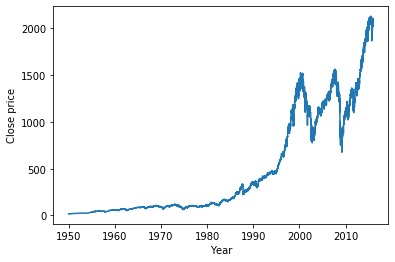

In [6]:
# Evolution close price 
plt.plot(data['Date'], data['Close'])
plt.ylabel('Close price')
plt.xlabel('Year');


In [7]:
# Evolucion of close price in 2010
year_2010 = data[(data["Date"] > datetime(year=2009, month=12, day=31)) & 
                 (data["Date"] < datetime(year=2011, month=1, day=1))]

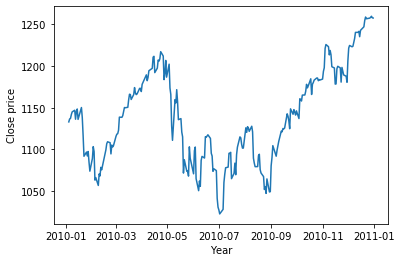

In [8]:
plt.plot(year_2010['Date'],year_2010['Close'])
plt.ylabel('Close price')
plt.xlabel('Year');

In [9]:
# Evolution of themoving average close price 5 days  
year_2010['avg_5_days_close'] = year_2010.rolling(5).mean()['Close']
year_2010['avg_5_days_close'] = year_2010['avg_5_days_close'].shift(1)

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


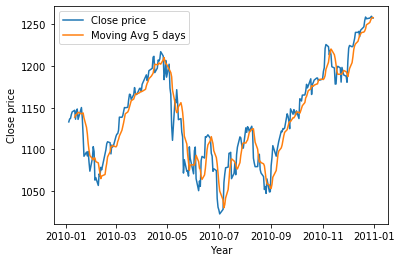

In [10]:
plt.plot(year_2010['Date'], year_2010['Close'], label = 'Close price')
plt.plot(year_2010['Date'], year_2010['avg_5_days_close'], label = 'Moving Avg 5 days')
plt.ylabel('Close price')
plt.legend(loc="upper left")
plt.xlabel('Year');

####  Smoothing close price

We are going to create a new column that contains the average price of the last 5 trades for each row. This will incorporate information from multiple prior rows into one, and will make predictions much more accurate.

In [11]:
data['avg_5_days_close'] = data.rolling(5).mean()['Close']

In [12]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5_days_close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,NaN
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,NaN
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,NaN
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,NaN
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,16.9


We must be careful not to use the current row in the values of our average. 
We need to reindex the resulting series to shift all the values "forward" one day.

In [13]:
data['avg_5_days_close'] = data['avg_5_days_close'].shift(1)
data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5_days_close
16589,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000,NaN
16588,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000,NaN
16587,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000,NaN
16586,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000,NaN
16585,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000,NaN
16584,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001,16.900
16583,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000,16.974
16582,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000,17.022
16581,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000,16.988
16580,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999,16.926


In [14]:
# new column standard deviation last 30 days
data['std_30_days_close'] = data.rolling(30).std()['Close']

In [15]:
# Shift results 
data['std_30_days_close'] = data['std_30_days_close'].shift(1)

In [16]:
# Ratio between the standard deviation for the past 5 days, and the standard deviation for the past 365 days.
data['ratio_std_5_365_close'] = data.rolling(5).std()['Close'] / data.rolling(365).std()['Close']

In [17]:
# Shift results 
data['ratio_std_5_365_close'] = data['ratio_std_5_365_close'].shift(1)

In [18]:
# new column standard deviation last 5 days volume
data['std_5_days_volume'] = data.rolling(5).std()['Close']

In [19]:
# Shift results 
data['std_5_days_volume'] = data['std_5_days_volume'].shift(1)

In [20]:
# new column average last 30 days volume
data['avg_30_days_volume'] = data.rolling(30).std()['Close']

In [21]:
# Shift results 
data['avg_30_days_volume'] = data['avg_30_days_volume'].shift(1)

#### Data cleaning

There are some rows where there isn't enough historical data to generate them. we have an indicator use 365 days of historical data, and the dataset starts on 1950-01-03. Thus, any rows that fall before 1951-01-03 don't have enough historical data to compute all the indicators. We'll need to remove these rows.

In [22]:
# remove data before 1950-01-03.
data = data[data["Date"] > datetime(year=1951, month=1, day=2)]
data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5_days_close,std_30_days_close,ratio_std_5_365_close,std_5_days_volume,avg_30_days_volume
16339,1951-01-03,20.690001,20.690001,20.690001,20.690001,3370000.0,20.690001,20.360000,0.403850,NaN,0.304385,0.403850
16338,1951-01-04,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.514000,0.434320,NaN,0.204524,0.434320
16337,1951-01-05,20.870001,20.870001,20.870001,20.870001,3390000.0,20.870001,20.628000,0.473021,NaN,0.214057,0.473021
16336,1951-01-08,21.000000,21.000000,21.000000,21.000000,2780000.0,21.000000,20.726001,0.506783,NaN,0.181879,0.506783
16335,1951-01-09,21.120001,21.120001,21.120001,21.120001,3800000.0,21.120001,20.840001,0.543144,NaN,0.117047,0.543144
16334,1951-01-10,20.850000,20.850000,20.850000,20.850000,3270000.0,20.850000,20.910001,0.581016,NaN,0.161090,0.581016
16333,1951-01-11,21.190001,21.190001,21.190001,21.190001,3490000.0,21.190001,20.942001,0.602189,NaN,0.116060,0.602189
16332,1951-01-12,21.110001,21.110001,21.110001,21.110001,2950000.0,21.110001,21.006001,0.635242,NaN,0.149767,0.635242
16331,1951-01-15,21.299999,21.299999,21.299999,21.299999,2830000.0,21.299999,21.054001,0.651346,NaN,0.132778,0.651346
16330,1951-01-16,21.459999,21.459999,21.459999,21.459999,3740000.0,21.459999,21.114000,0.677254,NaN,0.165922,0.677254


In [23]:
data.dropna(axis = 0, inplace = True)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,avg_5_days_close,std_30_days_close,ratio_std_5_365_close,std_5_days_volume,avg_30_days_volume
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,21.800,0.473595,0.143121,0.256223,0.473595
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,21.900,0.444648,0.119409,0.213659,0.444648
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,21.972,0.411452,0.051758,0.092574,0.411452
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,21.960,0.368514,0.064390,0.115108,0.368514
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,21.862,0.329130,0.114293,0.204132,0.329130


#### LInear Regression model 

In [24]:
# Train should contain any rows in the data with a date less than 2013-01-01
train_data = data[data["Date"] < datetime(year=2013, month=1, day=1)]

In [25]:
# Test should contain any rows with a date greater than or equal to 2013-01-01.
test_data = data[data["Date"] >= datetime(year=2013, month=1, day=1)]

In [26]:
features = ['avg_5_days_close', 'std_30_days_close', 'ratio_std_5_365_close']
lr = LinearRegression()
lr.fit(train_data[features], train_data['Close'])
close_prediction = lr.predict(test_data[features])
mae = mean_absolute_error(test_data['Close'], close_prediction)
print("mean absolute error: ", mae)

mean absolute error:  16.211274542202275


Would be improved the result adding 2 more columns?

In [27]:
features = ['avg_5_days_close', 'std_30_days_close', 'ratio_std_5_365_close',
            'std_5_days_volume', 'avg_30_days_volume']
lr = LinearRegression()
lr.fit(train_data[features], train_data['Close'])
close_prediction = lr.predict(test_data[features])
mae = mean_absolute_error(test_data['Close'], close_prediction)
print("mean absolute error: ", mae)

mean absolute error:  16.16200587213265


#### Making predictions only one day ahead

Accuracy would improve by making predictions only one day ahead. For example, train a model using data from 1951-01-03 to 2013-01-02, make predictions for 2013-01-03, and then train another model using data from 1951-01-03 to 2013-01-03, make predictions for 2013-01-04, and so on. This more closely simulates what you'd do if you were trading using the algorithm.

In [28]:
train = data[data["Date"] < datetime(year=2013, month=1, day=1)]
test = data[data["Date"] == datetime(year=2013, month=1, day=1)]

In [29]:
# Betrween 2013-01-02 and 2013-02-13
days = data.iloc[15486:15516, 0].astype(str).tolist()

In [30]:
mae_list = [] 
for day in days:
    train = data[data["Date"] < day]
    test =  data[data["Date"] == day]
    lr = LinearRegression()
    lr.fit(train[features], train['Close'])
    close_prediction = lr.predict(test[features])
    mae = mean_absolute_error(test['Close'], close_prediction)
    mae_list.append(mae)

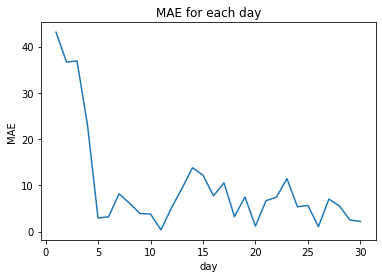

In [31]:
plt.plot(range(1,31), mae_list)
plt.title('MAE for each day')
plt.xlabel('day')
plt.ylabel('MAE');

In [32]:
# last 30 days of the data: 2015-10-26 to 2015-12-07
last_days = data.iloc[-30:, 0].astype(str).tolist();

In [33]:
mae_last = [] 
for day in last_days:
    train = data[data["Date"] < day]
    test =  data[data["Date"] == day]
    lr = LinearRegression()
    lr.fit(train[features], train['Close'])
    close_prediction = lr.predict(test[features])
    mae = mean_absolute_error(test['Close'], close_prediction)
    mae_last.append(mae)

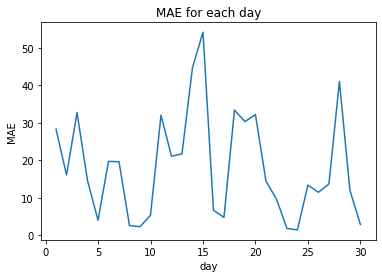

In [34]:
plt.plot(range(1,31), mae_last)
plt.title('MAE for each day')
plt.xlabel('day')
plt.ylabel('MAE');

#### Conclusions

We have worked with the historical data of the S&P 500 and we have used the linear regression model to predict the close price. We have seen the high variability of the MAE using this approach.